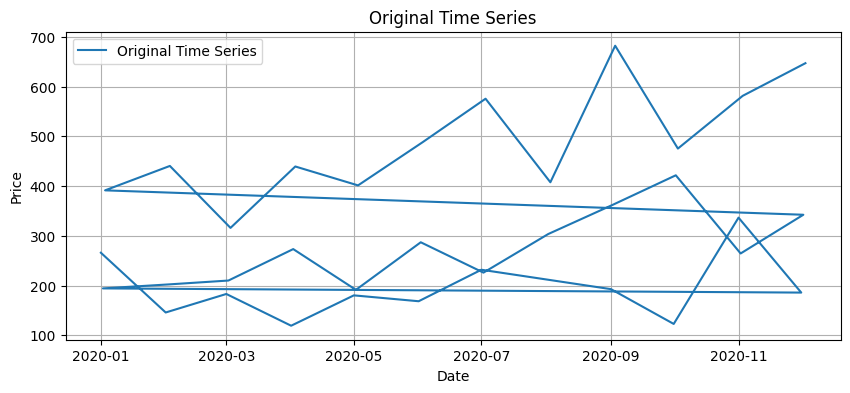

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsm

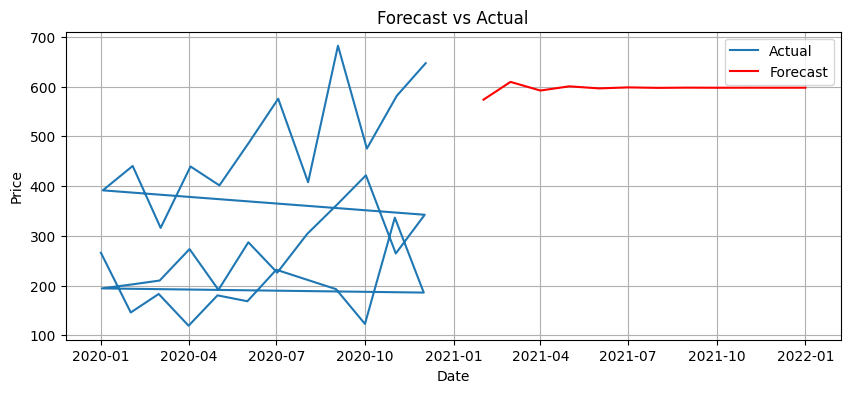

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Load the dataset
file_path = 'Dataset.csv'
data = pd.read_csv(file_path)

# Step 2: Fix the month column by adding a year
data['month'] = data['month'] + '-2020'  # Add dummy year

# Step 3: Convert to datetime
data['month'] = pd.to_datetime(data['month'], format='%d-%b-%Y')

# Step 4: Set date as index
data.set_index('month', inplace=True)

# Step 5: Handle missing values
data['price'] = data['price'].interpolate()

# Step 6: Plot the original time series
plt.figure(figsize=(10, 4))
plt.plot(data['price'], label='Original Time Series')
plt.title('Original Time Series')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Build and train ARIMA model
# Simple assumption: (p=1, d=1, q=1)
model = ARIMA(data['price'], order=(1, 1, 1))
model_fit = model.fit()

# Step 8: Forecast future values
forecast_steps = 12  # Next 12 months
forecast = model_fit.forecast(steps=forecast_steps)

# Step 9: Plot forecast vs original
plt.figure(figsize=(10, 4))
plt.plot(data['price'], label='Actual')
future_dates = pd.date_range(data.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='MS')
plt.plot(future_dates, forecast, label='Forecast', color='red')
plt.title('Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
